#El algoritmo del perceptrón, y el error en muestra y fuera de muestra

#Introducción

Esta práctica tiene como fin poner en relieve las ideas básicas de el aprendizaje, utilizando uno de los métodos de aprendizaje más antiguos y fáciles de implementar.

Esta práctica no intenta ser un remplazo del curso, por lo que se asume que los estudiantes conocen el algoritmo de aprendizaje del perceptrón (PLA por sus sigles en inglés), así como las ideas básicas sobre error en muestra y error fuera de muestra. Para esta práctica se puede realizar el problema en cualquier lenguaje de computación que conozca el estudiante. Sin embargo, se recomienda un lenguaje con capacidades de graficación, tal como Matlab, R y Python (con numpy y matplotlib).

Recordemos que el error fuera de muestra E_o es el error sobre todo el conjunto de puntos del espacio X. Una vez definido el criterio del error, el objetivo del aprendizaje es encontrar una hipótesis g en el conjunto de todas las hipótesis posibles que se pueden hacer con el método de aprendizaje.

Lamentablemente, en todos los casos reales se desconoce E_o y lo más que se puede esperar es aproximarlo a partir del error en muestra E_i, el cual se define como el error medio de un conjunto de datos de aprendizaje disponibles.

Para el caso del perceptrón, E_o es la esperanza que un dato se encuentre mal clasificado, y E_i es el porcentaje de datos mal clasificados por el perceptrón. Tambien sabemos, por lo visto en el curso, que si el conjunto de datos que se utiliza en el algoritmo de PLA es linealmente separable, entonces siempre se tiene una hipótesis final g tal que E_i = 0.

Entonces, ¿Si E_i = 0, podríamos decir que el PLA aprende perfectamente? Desgraciadamente esto es falso. ¿Y eso porqué? Pues porque lo que nos interesa es E_o = 0 y no E_i = 0. Esta práctica tiene como fin dejar clara la diferencia entre E_i y E_o.

Para esto, vamos a hacer un poco de trampa, vamos a suponer que nosotros efectivamente conocemos la función con la que se generaron los datos de aprendizaje, la cual va a ser una función del tipo y = sign(k_0 + k_1 * x_1 + k_2 * x_2). Después vamos a generar datos con esta función, y vamos a estimar g(x) = sign(w_0 + w_1 * x_1 + w_2 * x_2) con el PLA. Así nosotros podemos hacer una estimación suficientemente aproximada de que tan grande es en general la diferencia entre E_i y E_o para diferente número de datos en el conjunto de aprendizaje.

#Práctica a realizar

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

*   Desarrolla una función `modelo_aleatorio` en el cual:

	a. Se soliciten 4 numeros aleatorios entre el 0 y el 1, a los que llamaremos x1, y1, x2, y2.

	b. Se obtenga el valor de os pesos de la recta que pasa entre los dos puntos calculados como:

        k_2 = 1
        k_1 = (y2 - y1) / (x2 - x1)
        k_0 = y_1 - k_1 * x_1


	de forma que:

        k_0, k_1, k_2 = modelo_aleatorio()

In [2]:
def modelo_aleatorio():

    x1 = np.random.uniform(0,1)
    y1 = np.random.uniform(0,1)
    x2 = np.random.uniform(0,1)
    y2 = np.random.uniform(0,1)

    k_2 = 1.0 
    k_1 = (y2 - y1) / (x2 - x1) 
    k_0 = y1 - k_1 * x1 

    return k_0, k_1, k_2

In [11]:
print "Funcion 1: modelo_aleatorio \n"

k_0, k_1, k_2 = modelo_aleatorio()

print "k_0:", k_0
print "k_1:", k_1
print "k_2:", k_2

Funcion 1: modelo_aleatorio 

k_0: 9.56564678461
k_1: -14.6881902699
k_2: 1.0


* Desarrolla una función `genera_datos` tal que reciba un número entero positivo `N` y devuelva una matriz `X` 
   de `N` renglones y 2 columnas de manera que los valores de la matriz sean datos aleatorios en el intervalo [0, 1].
   ```
   X = genera_datos(N)
   ```

In [12]:
def genera_datos(N):

    return None if N <= 0 else np.column_stack((np.ones(N), (np.random.uniform(0, 1, size=(N, 2)))))

In [13]:
print "Funcion 2: genera_datos \n"

X = genera_datos(25)

print "Matriz X: \n"
print X

Funcion 2: genera_datos 

Matriz X: 

[[ 1.          0.71804745  0.67959322]
 [ 1.          0.79356873  0.32876212]
 [ 1.          0.20009616  0.44538314]
 [ 1.          0.18017485  0.3238359 ]
 [ 1.          0.14770865  0.43359907]
 [ 1.          0.11789248  0.116258  ]
 [ 1.          0.20977513  0.35388107]
 [ 1.          0.01529173  0.54485276]
 [ 1.          0.07118083  0.62452072]
 [ 1.          0.27320267  0.51559774]
 [ 1.          0.80429774  0.83357618]
 [ 1.          0.99094769  0.75449559]
 [ 1.          0.27849695  0.1733744 ]
 [ 1.          0.82740589  0.72290075]
 [ 1.          0.55825866  0.72083898]
 [ 1.          0.43655576  0.78823525]
 [ 1.          0.70491594  0.97705001]
 [ 1.          0.55482505  0.35296887]
 [ 1.          0.22075402  0.47751191]
 [ 1.          0.06693352  0.69111075]
 [ 1.          0.71647372  0.65347329]
 [ 1.          0.52562606  0.34119328]
 [ 1.          0.02633367  0.13791563]
 [ 1.          0.07854976  0.7738456 ]
 [ 1.          0.88256703 

* Desarrolla una función `discriminante_lineal` tal que reciba tres valores `k_0` `k_1` y `k_2` y  una matriz `X` de    2 por `N` y devuelva un vector `Y` de `N` elementos tales que por cada renglon `j` de la matriz X, se devuelva el 
   `j`-ésimo valor del vector `Y` tal que su valor sea `sign(k_0 + k_1 * x_1 + k_2 * x_2)`.
   ```
   Y = discriminante_lineal(k_0, k_1, k_2, X) 
   ``` 

In [14]:
def discriminante_lineal(k_0, k_1, k_2, X):

    Y = []

    for i in xrange(X.shape[0]):
        x_1 = X[i][1]
        x_2 = X[i][2]
        Y.append(np.sign(k_0 + k_1 * x_1 + k_2 * x_2))

    return Y

In [15]:
print "Funcion 3: discriminante_lineal \n"

Y = discriminante_lineal(k_0, k_1, k_2, X)

print "Y:", Y

Funcion 3: discriminante_lineal 

Y: [-1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0]


* Desarrolla una función `PLA` que implemente el algoritmo de aprendizaje del perceptrón para encontrar 
   `w_0`, `w_1` y `w_2`.
   ```
   w_0, w_1, w_2 = PLA(X, Y)
   ```

In [16]:
def PLA(X, Y):

    w = np.ones(X.shape[1])
    indice = np.arange(0, X.shape[0])
    flag = False
    
    while flag != True:
        
        np.random.shuffle(indice)
        flag = True

        for i in indice:

            Y_e = np.sign(np.dot(X[i], w))

            if Y[i] != Y_e:
                w = w + np.dot(Y[i], X[i])
                flag = False
                break
    return w

In [17]:
print "Funcion 4: PLA \n"

w_0, w_1, w_2 = PLA(X, Y)

print "w_0:", w_0
print "w_1:", w_1
print "w_2:", w_2

Funcion 4: PLA 

w_0: 2.0
w_1: -3.21037891198
w_2: 0.448412939885


* Desarrolla una función `error_clasificacion` que reciba un vector de valores `Y`y un vector de valores `Y_e` y 
   calcule el porcentaje de valores diferentes entre ambos vectores
   ```
   e = error_clasificacion(Y, Y_e)
   ```

In [18]:
def error_clasificacion(Y, Y_e):
    
    c = 0

    for i in xrange(len(Y)):
        
        if Y[i] != Y_e[i]:
            c += 1

    return c / float(len(Y))

In [19]:
print "Funcion 5: error_clasificacion \n"

E_i = error_clasificacion(Y, Y)

print "E_i:", E_i

Funcion 5: error_clasificacion 

E_i: 0.0


* Prueba que el conjunto funciona, esto es, para diferentes valores de `N` y repetidos tantas veces 
   como sea necesario al realizar lo siguiente:
   ```
   k_0, k_1, k_2 = modelo_aleatorio()
   X = genera_datos(N)
   Y = discriminante_lineal(k_0, k_1, k_2, X)
   w_0, w_1, w_2 = PLA(X, Y)
   Y_e = discriminante_lineal(w_0, w_1, w_2, X)
   E_i = error_clasificacion(Y, Y_e)
   ```
   en todos los casos `e` debe de ser 0 o un valor muy cercano (como `1e-12`).

In [21]:
print "Funcion 6: prueba E_i \n"

for N in xrange(1000, 10000 + 1000, 1000):

    k_0, k_1, k_2 = modelo_aleatorio()
    X = genera_datos(N)
    Y = discriminante_lineal(k_0, k_1, k_2, X)
    w_0, w_1, w_2 = PLA(X, Y)
    Y_e = discriminante_lineal(w_0, w_1, w_2, X)
    E_i = error_clasificacion(Y, Y_e)

    print "E_i de", N, ":", E_i

Funcion 6: prueba E_i 

E_i de 1000 : 0.0
E_i de 2000 : 0.0
E_i de 3000 : 0.0
E_i de 4000 : 0.0
E_i de 5000 : 0.0
E_i de 6000 : 0.0
E_i de 7000 : 0.0
E_i de 8000 : 0.0
E_i de 9000 : 0.0
E_i de 10000 : 0.0


* `E_i` Es en este caso el error en muestra, que es el que se obtiene de verificar el error que el clasificador
   (descrito por `w_0`, `w_1` y `w_2`) presenta respecto a los datos reales, pero únicamente de datos de aprendizaje.
   
   Este error no es exactamente el error fuera de muestra, y para calcular dicho error en el plano [0, 1] x [0, 1]
   hay que realizar algunas operaciones de geometría analítica que no siempre son sencillas. Por esta razón vamos a
   considerar estimar el E_out, con un conjunto de datos sensiblemente mayor al que utilizamos para el aprendizaje.
   por ejemplo:
   ```
   X_o = genera_datos(10000)
   Y_o = discriminante_lineal(k_0, k_1, k_2, X_o)
   Y_eo = discriminante_lineal(w_0, w_1, w_2, X_o)
   E_o = error_clasificacion(Y_o, Y_eo)
   ```

In [42]:
print "Funcion 7: prueba E_o \n"

X_o = genera_datos(10000)
Y_o = discriminante_lineal(k_0, k_1, k_2, X_o)
Y_eo = discriminante_lineal(w_0, w_1, w_2, X_o)
E_o = error_clasificacion(Y_o, Y_eo)

print "E_o:", E_o

Funcion 7: prueba E_o 

E_o: 0.0


* Ahora vamos a comparar con un número diferente de datos de aprendizaje, como E_o cambia en terminos generales. 
   Con el fin de generalizar, haga una función que reciba un valor `N` y devuelva un `E_o_prom` estimado de la 
   siguiente forma:
   ```
   Entrada: N
   Salida: E_o_prom
   
   E_lista = arreglo e numeros de 500 espacios
   X_o = genera_datos(10000)

   para epoch de 1 a 100:
      k_0, k_1, k_2 = modelo_aleatorio()
      Y_o = discriminante_lineal(k_0, k_1, k_2, X_o)

      para iter de 1 a 100:
          X = genera_datos(N)
          Y = discriminante_lineal(k_0, k_1, k_2, X)
          w_0, w_1, w_2 = PLA(X, Y)
          Y_eo = discriminante_lineal(w_0, w_1, w_2, X_o)
          E_o = error_clasificacion(Y_o, Y_eo)
          E_lista[100 * epoch + iter] = E_o
      fin para

   fin para

   devuelve el valor promedio de los valores de E_lista
   ```
   Como puede verse en el pseudocódigo, la idea es poder estimar en forma general el error promedio entre el 
   E_i y el E_o que tendríamos si tuvieramos solo `N` datos de aprendizaje. 

In [22]:
def E_o_prom(N):

    E_lista = np.zeros(500)
    X_o = genera_datos(10000)

    for epoch in xrange(1, 100):
        k_0, k_1, k_2 = modelo_aleatorio()
        Y_o = discriminante_lineal(k_0, k_1, k_2, X_o)

        for iter in xrange(1, 100):
            X = genera_datos(N)
            Y = discriminante_lineal(k_0, k_1, k_2, X)
            w_0, w_1, w_2 = PLA(X, Y)
            Y_eo = discriminante_lineal(w_0, w_1, w_2, X_o)
            E_o = error_clasificacion(Y_o, Y_eo)
            indice = 100 * epoch + iter
        
            if len(E_lista) <= indice:
                temp = np.zeros(indice + 1)
                for i in xrange(0, len(E_lista)):
                    temp[i] = E_lista[i]
                temp[indice] = E_o
                E_lista = temp[:]
            else:
                E_lista[indice] = E_o

    return sum(E_lista) / len(E_lista)

In [24]:
print "Funcion 8: pseudocodigo E_o_prom \n"

E_o_prom = E_o_prom(10)

print "E_o_prom", E_o_prom

Funcion 8: pseudocodigo E_o_prom 

E_o_prom 0.03425929


* Explica en forma gráfica que es lo que se está haciendo y que es el valor que estamos midiendo.

Funcion 9: grafica 

N: 10    E_o: 0.04893768
N: 20    E_o: 0.02371382
N: 30    E_o: 0.01695317
N: 40    E_o: 0.01257113
N: 50    E_o: 0.00835986
N: 60    E_o: 0.00757003
N: 70    E_o: 0.0079465
N: 80    E_o: 0.00625278
N: 90    E_o: 0.00468784
N: 100    E_o: 0.00548626


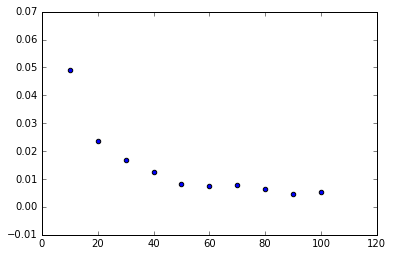

In [44]:
print "Funcion 9: grafica \n"

E_o = []
N = np.arange(10, 100+10, 10)

for i in N:
    
    e_o = E_o_prom(i)
    E_o.append(e_o)

for i in xrange(len(N)):
    
    print "N: " + str(N[i]) + "    " + "E_o: " + str(E_o[i])


x = [x for x in N]
y = [y for y in E_o]

plt.scatter(x, y)
plt.show()

* Realiza una tabla con los valores de `E_o_prom` para `N` que tome los valores de 10, 20, 50, 100, 500 
    respectivamente. Escribe claramente tus conclusiones de este trabajo. 

In [21]:
print "Funcion 10: tabla de E_o_prom \n"

e1 = E_o_prom(10)
e2 = E_o_prom(20)
e3 = E_o_prom(50)
e4 = E_o_prom(100)
e5 = E_o_prom(500)

print "N: " + str(10) + "    " + "E_o: " + str(e1) 
print "N: " + str(20) + "    " + "E_o: " + str(e2) 
print "N: " + str(50) + "    " + "E_o: " + str(e3) 
print "N: " + str(100) + "    " + "E_o: " + str(e4) 
print "N: " + str(500) + "    " + "E_o: " + str(e5) 

Funcion 10: tabla de E_o_prom 

N: 10    E_o: 0.00457307692308
N: 20    E_o: 0.00309945054945
N: 50    E_o: 0.00051021978022
N: 100    E_o: 0.000849450549451
N: 500    E_o: 9.96703296703e-05
